# "Unearthing Liverpool FC's Heritage: Exploring the Club's Rich History and Legacy" 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import matplotlib.cm as cm
import math
from math import pi
import itertools
import os
import csv
import glob
import pygal
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
liverpool = pd.read_csv("/Users/gowthamramakrishnan/Desktop/Liverpool/liverpool.csv",encoding='ISO-8859-1')


In [3]:
liverpool

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,4,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
1,20,18/08/93,QPR,Liverpool,1,3,A,NaN,NaN,NaN,1993-94
2,33,22/08/93,Swindon,Liverpool,0,5,A,NaN,NaN,NaN,1993-94
3,40,25/08/93,Liverpool,Tottenham,1,2,A,NaN,NaN,NaN,1993-94
4,49,28/08/93,Liverpool,Leeds,2,0,H,NaN,NaN,NaN,1993-94
...,...,...,...,...,...,...,...,...,...,...,...
953,9612,14/04/18,Liverpool,Bournemouth,3,0,H,1.0,0.0,H,2017-18
954,9624,21/04/18,West Brom,Liverpool,2,2,D,0.0,1.0,A,2017-18
955,9632,28/04/18,Liverpool,Stoke,0,0,D,0.0,0.0,D,2017-18
956,9647,6/5/2018,Chelsea,Liverpool,1,0,H,1.0,0.0,H,2017-18


In [4]:
liverpool = liverpool.dropna()

In [5]:
liverpool_copy = liverpool.copy()
liverpool_copy['HTHG'].fillna(0, inplace=True)
liverpool_copy['HTAG'].fillna(0, inplace=True)
liverpool_copy['HTR'].fillna('None', inplace=True)

liverpool = liverpool_copy

In [6]:
# Check for missing values
missing_values = liverpool.isnull().sum()
print(missing_values)

Unnamed: 0    0
Date          0
HomeTeam      0
AwayTeam      0
FTHG          0
FTAG          0
FTR           0
HTHG          0
HTAG          0
HTR           0
Season        0
dtype: int64


In [7]:
liverpool_copy

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
84,928,19/08/95,Liverpool,Sheffield Weds,1,0,H,0.0,0.0,D,1995-96
85,935,21/08/95,Leeds,Liverpool,1,0,H,0.0,0.0,D,1995-96
86,952,26/08/95,Tottenham,Liverpool,1,3,A,0.0,2.0,A,1995-96
87,958,30/08/95,Liverpool,QPR,1,0,H,1.0,0.0,H,1995-96
88,971,9/9/1995,Wimbledon,Liverpool,1,0,H,1.0,0.0,H,1995-96
...,...,...,...,...,...,...,...,...,...,...,...
953,9612,14/04/18,Liverpool,Bournemouth,3,0,H,1.0,0.0,H,2017-18
954,9624,21/04/18,West Brom,Liverpool,2,2,D,0.0,1.0,A,2017-18
955,9632,28/04/18,Liverpool,Stoke,0,0,D,0.0,0.0,D,2017-18
956,9647,6/5/2018,Chelsea,Liverpool,1,0,H,1.0,0.0,H,2017-18


Performance Analysis:

Calculate the total number of goals scored by Liverpool FC in each season. Determine the average number of goals scored per match by Liverpool FC. Analyze the distribution of wins, losses, and draws for Liverpool FC over the seasons. Identify any patterns or trends in Liverpool FC's performance based on the full-time and half-time results.

Calculate the total number of goals scored by Liverpool FC in each season

In [8]:
goals_per_season = liverpool_copy.groupby('Season')['FTHG', 'FTAG'].sum().reset_index()
goals_per_season['Total Goals'] = goals_per_season['FTHG'] + goals_per_season['FTAG']
print(goals_per_season)

     Season  FTHG  FTAG  Total Goals
0   1995-96    67    37          104
1   1996-97    56    43           99
2   1997-98    68    42          110
3   1998-99    69    48          117
4   1999-00    45    36           81
5   2000-01    65    45          110
6   2001-02    49    48           97
7   2002-03    55    47          102
8   2003-04    51    41           92
9   2004-05    57    36           93
10  2005-06    49    33           82
11  2006-07    59    25           84
12  2007-08    58    37           95
13  2008-09    55    49          104
14  2009-10    63    33           96
15  2010-11    67    36          103
16  2011-12    48    39           87
17  2012-13    60    54          114
18  2013-14    85    66          151
19  2014-15    58    42          100
20  2015-16    61    52          113
21  2016-17    69    51          120
22  2017-18    73    49          122


/var/folders/96/qqlkbqys6kqb27dyfw97gdz40000gp/T/ipykernel_5791/1413850498.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  goals_per_season = liverpool_copy.groupby('Season')['FTHG', 'FTAG'].sum().reset_index()


Determine the average number of goals scored per match by Liverpool FC

In [9]:
liverpool_copy['Total Goals'] = liverpool_copy['FTHG'] + liverpool_copy['FTAG']
average_goals_per_match = liverpool_copy.groupby('Season')['Total Goals'].mean()
print(average_goals_per_match)

Season
1995-96    2.736842
1996-97    2.605263
1997-98    2.894737
1998-99    3.078947
1999-00    2.131579
2000-01    2.894737
2001-02    2.552632
2002-03    2.684211
2003-04    2.421053
2004-05    2.447368
2005-06    2.157895
2006-07    2.210526
2007-08    2.500000
2008-09    2.736842
2009-10    2.526316
2010-11    2.710526
2011-12    2.289474
2012-13    3.000000
2013-14    3.973684
2014-15    2.631579
2015-16    2.973684
2016-17    3.157895
2017-18    3.210526
Name: Total Goals, dtype: float64


Analyze the distribution of wins, losses, and draws for Liverpool FC over the seasons:

In [10]:
result_distribution = liverpool_copy.groupby('Season')['FTR'].value_counts().unstack().fillna(0)
print(result_distribution)

FTR       A   D   H
Season             
1995-96   7  11  20
1996-97  12  11  15
1997-98   9  11  18
1998-99   9   9  20
1999-00  12  10  16
2000-01   9   9  20
2001-02  14   8  16
2002-03  11  10  17
2003-04  11  12  15
2004-05   8   7  23
2005-06  11   7  20
2006-07   7   8  23
2007-08  10  13  15
2008-09  13  11  14
2009-10   8   9  21
2010-11   8   7  23
2011-12  12  10  16
2012-13  11  13  14
2013-14  12   6  20
2014-15  12   8  18
2015-16  11  12  15
2016-17  12  10  16
2017-18   9  12  17


Identify any patterns or trends in Liverpool FC's performance based on full-time and half-time results:

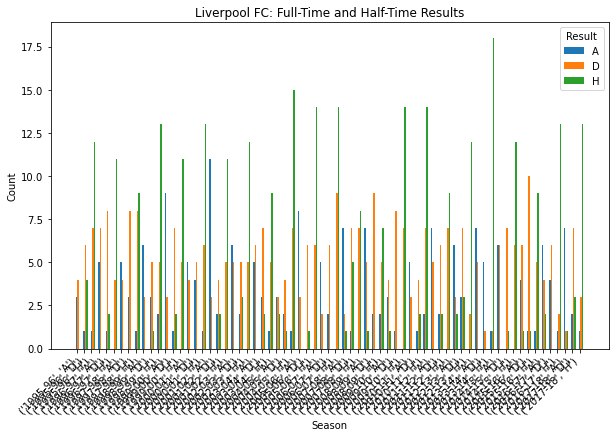

In [11]:
# Calculate the count of each combination of Full-Time Result (FTR) and Half-Time Result (HTR)
result_counts = liverpool_copy.groupby(['Season', 'FTR', 'HTR']).size().unstack().fillna(0)

# Set the categories and positions for the bars
categories = result_counts.columns
positions = np.arange(len(result_counts))

# Set the width of each bar
bar_width = 0.2

# Plot the grouped bars
fig, ax = plt.subplots(figsize=(10, 6))
for i, category in enumerate(categories):
    ax.bar(positions + (i * bar_width), result_counts[category], width=bar_width, label=category)

# Set plot labels and title
ax.set_xlabel('Season')
ax.set_ylabel('Count')
ax.set_title('Liverpool FC: Full-Time and Half-Time Results')
ax.set_xticks(positions)
ax.set_xticklabels(result_counts.index, rotation=45, ha='right')  # Rotate and align labels
ax.legend(title='Result')

# Show the plot
plt.show()


Home vs. Away Performance:

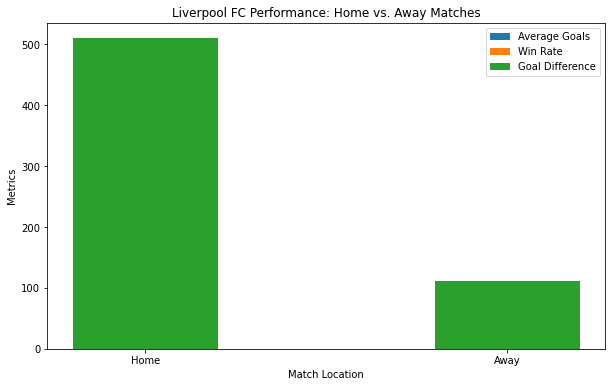

In [12]:
# Filter home matches
home_matches = liverpool_copy[liverpool_copy['HomeTeam'] == 'Liverpool']

# Filter away matches
away_matches = liverpool_copy[liverpool_copy['AwayTeam'] == 'Liverpool']

# Calculate average goals scored in home and away matches
avg_home_goals = home_matches['FTHG'].mean()
avg_away_goals = away_matches['FTAG'].mean()

# Calculate win rate in home and away matches
home_wins = home_matches[home_matches['FTR'] == 'H']
away_wins = away_matches[away_matches['FTR'] == 'A']
home_win_rate = len(home_wins) / len(home_matches) * 100
away_win_rate = len(away_wins) / len(away_matches) * 100

# Calculate goal difference in home and away matches
home_goal_difference = home_matches['FTHG'].sum() - home_matches['FTAG'].sum()
away_goal_difference = away_matches['FTAG'].sum() - away_matches['FTHG'].sum()

# Plotting the comparison
labels = ['Home', 'Away']
average_goals = [avg_home_goals, avg_away_goals]
win_rates = [home_win_rate, away_win_rate]
goal_differences = [home_goal_difference, away_goal_difference]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, average_goals, width=0.4, label='Average Goals')
ax.bar(labels, win_rates, width=0.4, label='Win Rate')
ax.bar(labels, goal_differences, width=0.4, label='Goal Difference')

ax.set_xlabel('Match Location')
ax.set_ylabel('Metrics')
ax.set_title('Liverpool FC Performance: Home vs. Away Matches')
ax.legend()

plt.show()

Identify most frequent opponents:

In [13]:
# Get the count of each opponent
opponent_counts = liverpool_copy['AwayTeam'].value_counts() + liverpool_copy['HomeTeam'].value_counts()

# Sort opponents by frequency
most_frequent_opponents = opponent_counts.sort_values(ascending=False).index[:5]  # Adjust the number as desired


Analyze match outcomes against specific teams:

In [14]:
# Filter matches against the most frequent opponents
matches_against_opponents = liverpool_copy[(liverpool_copy['HomeTeam'].isin(most_frequent_opponents)) |
                                           (liverpool_copy['AwayTeam'].isin(most_frequent_opponents))]

# Calculate win percentage, goal difference, and average goals scored against each opponent
opponent_stats = matches_against_opponents.groupby('AwayTeam').apply(lambda x: pd.Series({
    'Win Percentage': len(x[x['FTR'] == 'H']) / len(x) * 100,
    'Goal Difference': (x['FTHG'].sum() - x['FTAG'].sum()),
    'Average Goals Scored': (x['FTHG'].sum() + x['FTAG'].sum()) / len(x)
})).reset_index()

Identify trends or patterns in performance against specific opponents:

In [15]:
# Count the number of matches played against each team
opponent_counts = liverpool_copy['AwayTeam'].value_counts() + liverpool_copy['HomeTeam'].value_counts()

# Select the top 5 opponents
most_frequent_opponents = opponent_counts.nlargest(5).index.tolist()

print("Most Frequent Opponents:")
print(most_frequent_opponents)

Most Frequent Opponents:
['Liverpool', 'Arsenal', 'Chelsea', 'Everton', 'Man United']


In [16]:
# Count the number of matches played against each team
opponent_counts = liverpool_copy['AwayTeam'].value_counts().add(liverpool_copy['HomeTeam'].value_counts(), fill_value=0)

# Sort opponents based on the number of matches played
sorted_opponents = opponent_counts.sort_values(ascending=False)

print("Number of Matches Played Against Each Team (Descending Order):")
print(sorted_opponents)

Number of Matches Played Against Each Team (Descending Order):
Liverpool           874
Chelsea              46
Tottenham            46
Man United           46
Everton              46
Arsenal              46
Aston Villa          42
Newcastle            42
West Ham             40
Man City             36
Southampton          32
Sunderland           32
Blackburn            30
Bolton               26
Fulham               26
Middlesbrough        26
West Brom            24
Leicester            22
Stoke                20
Leeds                18
Charlton             16
Wigan                16
Birmingham           14
Swansea              14
Derby                14
Crystal Palace       14
Portsmouth           14
Coventry             12
Hull                 10
Sheffield Weds       10
Watford              10
Norwich              10
Wimbledon            10
Wolves                8
QPR                   8
Burnley               8
Reading               6
Nott'm Forest         6
Bournemouth           6
I

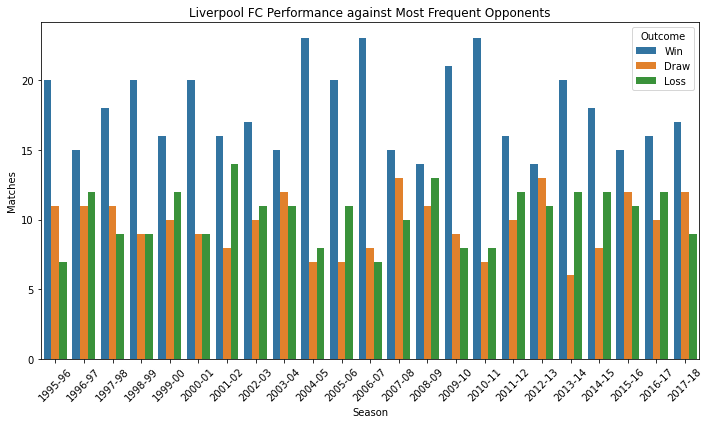

In [17]:
# Filter matches against the most frequent opponents
matches_against_opponents = liverpool_copy[(liverpool_copy['HomeTeam'].isin(most_frequent_opponents)) |
                                           (liverpool_copy['AwayTeam'].isin(most_frequent_opponents))]

# Create a new column for outcome
matches_against_opponents['Outcome'] = matches_against_opponents['FTR'].map({'H': 'Win', 'A': 'Loss', 'D': 'Draw'})

# Plotting the performance against each opponent
plt.figure(figsize=(10, 6))
sns.countplot(data=matches_against_opponents, x='Season', hue='Outcome', hue_order=['Win', 'Draw', 'Loss'])
plt.xlabel('Season')
plt.ylabel('Matches')
plt.title('Liverpool FC Performance against Most Frequent Opponents')
plt.legend(title='Outcome', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

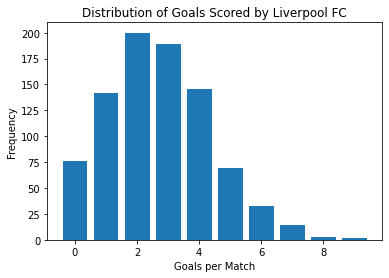

In [18]:
import matplotlib.pyplot as plt

# Calculate the frequency of goals per match
goals_per_match = liverpool_copy['FTHG'] + liverpool_copy['FTAG']
goal_counts = goals_per_match.value_counts().sort_index()

# Plot the distribution of goals per match
plt.bar(goal_counts.index, goal_counts.values)
plt.xlabel('Goals per Match')
plt.ylabel('Frequency')
plt.title('Distribution of Goals Scored by Liverpool FC')
plt.show()


In [20]:
liverpool_copy.columns

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTHG', 'HTAG', 'HTR', 'Season', 'Total Goals'],
      dtype='object')

In [25]:
import pandas as pd

# Filter the dataset for Premier League matches
premier_league = liverpool_copy

# Calculate performance metrics for Premier League
premier_league_stats = premier_league.groupby('Season').agg({
    'Date': 'count',
    'FTHG': 'sum',
    'FTAG': 'sum'
}).reset_index()

premier_league_stats.rename(columns={'Date': 'Matches'}, inplace=True)
premier_league_stats['Wins'] = premier_league[premier_league['FTR'] == 'H'].groupby('Season')['FTR'].count().values
premier_league_stats['Draws'] = premier_league[premier_league['FTR'] == 'D'].groupby('Season')['FTR'].count().values
premier_league_stats['Losses'] = premier_league[premier_league['FTR'] == 'A'].groupby('Season')['FTR'].count().values
premier_league_stats['WinPercentage'] = (premier_league_stats['Wins'] / premier_league_stats['Matches']) * 100
premier_league_stats['GoalsFor'] = premier_league_stats['FTHG']
premier_league_stats['GoalsAgainst'] = premier_league_stats['FTAG']
premier_league_stats['GoalDifference'] = premier_league_stats['GoalsFor'] - premier_league_stats['GoalsAgainst']

# Sort the DataFrame by season
premier_league_stats.sort_values('Season', inplace=True)

# Display the Premier League performance statistics
print(premier_league_stats)

     Season  Matches  FTHG  FTAG  Wins  Draws  Losses  WinPercentage  \
0   1995-96       38    67    37    20     11       7      52.631579   
1   1996-97       38    56    43    15     11      12      39.473684   
2   1997-98       38    68    42    18     11       9      47.368421   
3   1998-99       38    69    48    20      9       9      52.631579   
4   1999-00       38    45    36    16     10      12      42.105263   
5   2000-01       38    65    45    20      9       9      52.631579   
6   2001-02       38    49    48    16      8      14      42.105263   
7   2002-03       38    55    47    17     10      11      44.736842   
8   2003-04       38    51    41    15     12      11      39.473684   
9   2004-05       38    57    36    23      7       8      60.526316   
10  2005-06       38    49    33    20      7      11      52.631579   
11  2006-07       38    59    25    23      8       7      60.526316   
12  2007-08       38    58    37    15     13      10      39.47

In [26]:
premier_league_stats = premier_league.groupby('Season').agg({
    'Date': 'count',
    'FTHG': 'sum',
    'FTAG': 'sum'
}).reset_index()

premier_league_stats.rename(columns={'Date': 'Matches'}, inplace=True)
premier_league_stats['Wins'] = premier_league[premier_league['FTR'] == 'H'].groupby('Season')['FTR'].count().values
premier_league_stats['Draws'] = premier_league[premier_league['FTR'] == 'D'].groupby('Season')['FTR'].count().values
premier_league_stats['Losses'] = premier_league[premier_league['FTR'] == 'A'].groupby('Season')['FTR'].count().values
premier_league_stats['WinPercentage'] = (premier_league_stats['Wins'] / premier_league_stats['Matches']) * 100
premier_league_stats['GoalsFor'] = premier_league_stats['FTHG']
premier_league_stats['GoalsAgainst'] = premier_league_stats['FTAG']
premier_league_stats['GoalDifference'] = premier_league_stats['GoalsFor'] - premier_league_stats['GoalsAgainst']

# Sort the DataFrame by Win Percentage in descending order
premier_league_stats.sort_values('WinPercentage', ascending=False, inplace=True)

# Display the Premier League performance statistics
print(premier_league_stats)

     Season  Matches  FTHG  FTAG  Wins  Draws  Losses  WinPercentage  \
11  2006-07       38    59    25    23      8       7      60.526316   
9   2004-05       38    57    36    23      7       8      60.526316   
15  2010-11       38    67    36    23      7       8      60.526316   
14  2009-10       38    63    33    21      9       8      55.263158   
18  2013-14       38    85    66    20      6      12      52.631579   
10  2005-06       38    49    33    20      7      11      52.631579   
0   1995-96       38    67    37    20     11       7      52.631579   
5   2000-01       38    65    45    20      9       9      52.631579   
3   1998-99       38    69    48    20      9       9      52.631579   
2   1997-98       38    68    42    18     11       9      47.368421   
19  2014-15       38    58    42    18      8      12      47.368421   
7   2002-03       38    55    47    17     10      11      44.736842   
22  2017-18       38    73    49    17     12       9      44.73

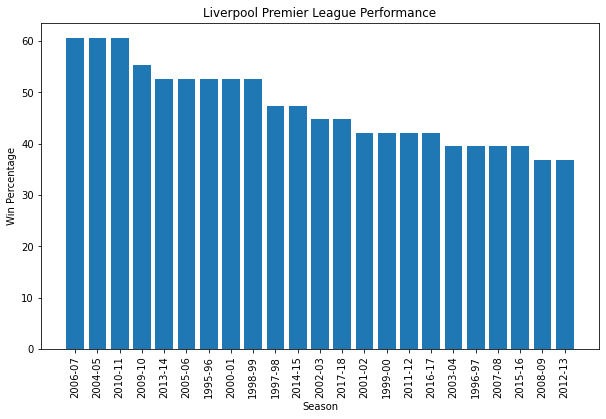

In [28]:
premier_league_stats.sort_values('WinPercentage', ascending=False, inplace=True)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot of Win Percentage
plt.bar(premier_league_stats['Season'], premier_league_stats['WinPercentage'])

# Set the labels and title
plt.xlabel('Season')
plt.ylabel('Win Percentage')
plt.title('Liverpool Premier League Performance')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()